<a href="https://colab.research.google.com/github/Preranakh/DeepLearningProjects_Udemy/blob/main/CarBrandDetector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
# -*- coding: utf-8 -*-
"""Car Brand Detection.ipynb


# IMPORTING REQUIRED LIBRARIES
"""

from tensorflow import keras
from tensorflow.keras.applications.resnet50 import ResNet50
from keras.utils.vis_utils import plot_model
from glob import glob
from keras.models import Model
from keras.layers import Flatten,Dense,Dropout,Softmax
from tensorflow.keras.optimizers import Adam 




In [29]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [30]:
"""# DATA ENTRY"""

Image_size = [224,224]
valid_path = "/content/drive/MyDrive/ColabNotebooks/DeepLearningProjects_Datasets/CarBrandDetector/Test"
train_path = "/content/drive/MyDrive/ColabNotebooks/DeepLearningProjects_Datasets/CarBrandDetector/Train"


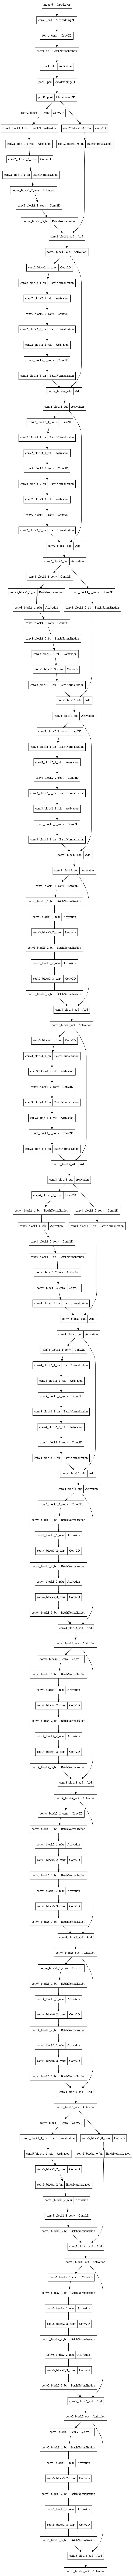

In [36]:
"""#CREATING THE MODEL AND ASSIGNING THE WEIGHTS"""

resnet = ResNet50(include_top=False , input_shape=Image_size+[3],weights='imagenet')

plot_model(resnet)



In [43]:
resnet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_6[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [44]:

for layer in resnet.layers:
  layer.trainable = False



In [45]:

"""# TO GET THE NUMBER OF CLASSES IN OUTPUT"""

folders = glob("/content/drive/MyDrive/ColabNotebooks/DeepLearningProjects_Datasets/CarBrandDetector/Train/*")
folders
len(folders)

3

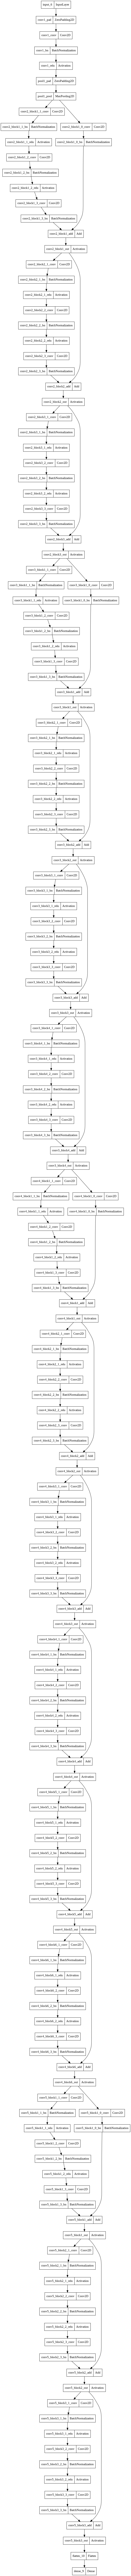

In [46]:
"""#Adding Extra Layers"""

x = Flatten()(resnet.output)

"""# Creating output layer"""

prediction = Dense(len(folders),activation='softmax')(x)
"""# Creating Model"""

model = Model(inputs = resnet.input , outputs = prediction)

plot_model(model)





In [48]:
model.compile(loss = 'categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_6[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

Found 64 images belonging to 3 classes.
Found 58 images belonging to 3 classes.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/50
2/2 [==============================] - 35s 24s/step - loss: 6.7607 - accuracy: 0.3750 - val_loss: 2.4096 - val_accuracy: 0.3276
Epoch 2/50
2/2 [==============================] - 21s 15s/step - loss: 6.2710 - accuracy: 0.3125 - val_loss: 7.6235 - val_accuracy: 0.1552
Epoch 3/50
2/2 [==============================] - 19s 14s/step - loss: 8.0984 - accuracy: 0.3125 - val_loss: 5.1765 - val_accuracy: 0.4655
Epoch 4/50
2/2 [==============================] - 19s 14s/step - loss: 4.4900 - accuracy: 0.4531 - val_loss: 2.0905 - val_accuracy: 0.5172
Epoch 5/50
2/2 [==============================] - 19s 13s/step - loss: 2.6856 - accuracy: 0.4375 - val_loss: 5.4289 - val_accuracy: 0.3276
Epoch 6/50
2/2 [==============================] - 20s 15s/step - loss: 4.1838 - accuracy: 0.3906 - val_loss: 3.8706 - val_accuracy: 0.1897
Epoch 7/50
2/2 [==============================] - 21s 14s/step - loss: 2.4116 - accuracy: 0.4219 - val_loss: 2.5525 - val_accuracy: 0.2241
Epoch 8/50
2/2 [===========

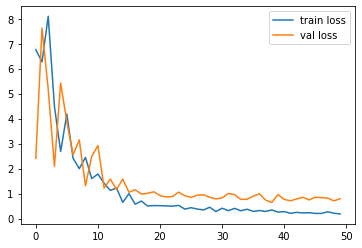

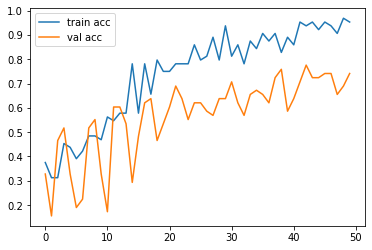

<Figure size 432x288 with 0 Axes>

In [49]:


from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory("/content/drive/MyDrive/ColabNotebooks/DeepLearningProjects_Datasets/CarBrandDetector/Train",target_size=(224,224),batch_size=32,class_mode='categorical')

test_set = train_datagen.flow_from_directory("/content/drive/MyDrive/ColabNotebooks/DeepLearningProjects_Datasets/CarBrandDetector/Test",target_size=(224,224),batch_size=32,class_mode='categorical')

r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')



In [53]:
from tensorflow.keras.models import load_model
import numpy as np

model.save('model_resnet50.h5')

y_pred = model.predict(test_set)

y_pred

y_pred = np.argmax(y_pred, axis=1)

from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input

model=load_model('model_resnet50.h5')

img=image.load_img('/content/drive/MyDrive/ColabNotebooks/DeepLearningProjects_Datasets/CarBrandDetector/Test/audi/23.jpg',target_size=(224,224))

x=image.img_to_array(img)

x =x /255

x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

preds = model.predict(x)
preds=np.argmax(preds, axis=1)
if preds==1:
  preds="The Car IS Audi"
elif preds==2:
  preds="The Car is Lamborghini"
else:
  preds="The Car Is Mercedes"
print(preds)

/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


The Car is Lamborghini
